In [2]:
import iminuit
from icecube import icetray, dataio, dataclasses, simclasses, clsim
from icecube.icetray import I3Units, OMKey, I3Frame
from icecube.dataclasses import ModuleKey
from os.path import expandvars
import numpy as np
import matplotlib.pylab as plt
import argparse
from scipy import stats
#from scipy.optimize import minimize
from scipy.stats.distributions import chi2
from likelihoodHelpers import log_likelihood_biGauss, log_likelihood_doublePeak, likelihood_ratio_doublePeak, likelihood_ratio_biGauss, biGauss, double_peak
import scipy
import csv

In [3]:
from iminuit import minimize

In [3]:
file_number = 713
f = open('/data/p-one/akatil/analysis/RecoPulses/RecoPulses_from_file_'+str(file_number)+'_time_charge.csv', 'w')

with f:
    fnames = ['file', 'frame', 'lepton', 'DOM', 'string', 'recoPulse_time', 'recoPulse_charge']
    writer = csv.writer(f)
    writer.writerow(fnames)
    for i in range(file_number, file_number+1):
        file_name = dataio.I3File('/data/p-one/akatil/step_5_medium_water/NuTau_NuE_20Events/step_5_'+str(i)+'_medium_water_custom_mDOM_recoPulse.i3.gz')
        frame_num = 0
        for frame in file_name:
            mctree = frame["I3MCTree"]
            primary = mctree.primaries
            lepton = dataclasses.I3MCTree.first_child(mctree, primary[0].id)

            recoPulseMap = frame['I3RecoPulses']
        
            for omkey in recoPulseMap.keys():
                recoPulseList = recoPulseMap[omkey]
                for recoPulse in recoPulseList:
                    recoPulse_timeList = recoPulse.time
                    recoPulse_chargeList = recoPulse.charge
                
                    info_list = [i, frame_num, lepton.type, omkey[1], omkey[0], recoPulse_timeList, recoPulse_chargeList]
                
                    writer.writerow(info_list)
                    
            frame_num += 1

In [64]:
class peakCalculators(object):
    
    def __init__(self):
        print 'Hello!'
    
    def setData(self, bin_centers, data):
        self.n = data
        self.x = bin_centers
        
    def getDoublePeakLLH(self, theta):
        
        model = double_peak(self.x, *theta)
        #print model
        #print self.n
        LLH = np.sum(model - (self.n*np.log(model)))
        
        #print LLH, theta
        
        
        return LLH
    
    def getBestFit(self):
        
        # Set limits
        extra_settings = {'limit_pos1': (self.x.min(), self.x.mean()),
                          'limit_wid1': (0, 500.),
                          'limit_r1': (0, 10.),
                          'limit_amp1':(0, self.n.max()*10),
                          'limit_pos2': (self.x.mean(), self.x.max()),
                          'limit_wid2': (0, 500.),
                          'limit_r2': (0, 10.),
                          'limit_amp2': (0, self.n.max()*10),
                          
                          'pos1': self.x.mean()-1.,
                          'wid1': 10.,
                          'r1': 0.8,
                          'amp1': self.n.max()/2.,
                          'pos2': self.x.mean()+2.,
                          'wid2': 15.,
                          'r2': 1.1,
                          'amp2': self.n.max()/2.,
                          'error_r1':0.1,
                          'error_r2':0.1
        }
        
        
        m = iminuit.Minuit(self.getDoublePeakLLH,
                           forced_parameters = ['pos1', 'wid1', 'r1', 'amp1', 
                                                'pos2', 'wid2', 'r2', 'amp2'],
                           #print_level=0,
                           errordef = 0.5,
                              use_array_call = True,
                          **extra_settings)
        
        fit = m.migrad()
        
        return m

In [65]:
llhfun = peakCalculators()
llhfun.setData( bin_centers, entries_in_bins)
llhfun.getDoublePeakLLH(initial_doublePeak)

Hello!


-4094.8353336467835

In [66]:
m = llhfun.getBestFit()

/cvmfs/icecube.opensciencegrid.org/py2-v3.1.1/RHEL_7_x86_64/lib/python2.7/site-packages/ipykernel_launcher.py:53: InitialParamWarning: Parameter pos1 is floating but does not have initial step size. Assume 1.
/cvmfs/icecube.opensciencegrid.org/py2-v3.1.1/RHEL_7_x86_64/lib/python2.7/site-packages/ipykernel_launcher.py:53: InitialParamWarning: Parameter wid1 is floating but does not have initial step size. Assume 1.
/cvmfs/icecube.opensciencegrid.org/py2-v3.1.1/RHEL_7_x86_64/lib/python2.7/site-packages/ipykernel_launcher.py:53: InitialParamWarning: Parameter amp1 is floating but does not have initial step size. Assume 1.
/cvmfs/icecube.opensciencegrid.org/py2-v3.1.1/RHEL_7_x86_64/lib/python2.7/site-packages/ipykernel_launcher.py:53: InitialParamWarning: Parameter pos2 is floating but does not have initial step size. Assume 1.
/cvmfs/icecube.opensciencegrid.org/py2-v3.1.1/RHEL_7_x86_64/lib/python2.7/site-packages/ipykernel_launcher.py:53: InitialParamWarning: Parameter wid2 is floating bu

FCN = -4433.5438724 
 TOTAL NCALL = 293 
 NCALLS = 293 
 
 
 EDM = 3.50855893962e-05 
 GOAL EDM = 5e-06 
 
 UP = 0.5 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 False 
 False 
 True 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,pos1,-2.87116,0.809074,,,-7.25782,-1.25782,No
1,wid1,7.92155,4.14444,,,0,500,No
2,r1,1.10071,1.13215,,,0,10,No
3,amp1,347.528,118.25,,,0,3680,No
4,pos2,-0.830507,3.72922,,,-1.25782,4.74218,No
5,wid2,18.0185,4.00614,,,0,500,No
6,r2,1.16571,0.958368,,,0,10,No
7,amp2,159.66,88.3502,,,0,3680,No


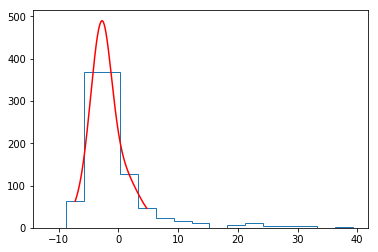

In [67]:
np.array(m.args)
x = np.linspace(min(bin_centers), max(bin_centers), 1000)
y_doublePeak = double_peak(x,*np.array(m.args))
plt.plot(x, y_doublePeak, '-', c = 'r')
_ = plt.hist(timestamps, bins=bins, weights=max_charge, histtype='step')

Now Histogramming
[-11.53717114 200.           1.36334155  15.42864684]
[-4.82456737e+01  7.30070799e+01  2.55471753e-05  1.46304036e+01
  5.17140777e-04  6.81356853e+01  6.53044686e-03  1.31908328e+01]
Now Histogramming
[-32.95111322 110.84701168   0.24286826  22.62512833]
[-3.02022824e+01  1.87130874e+01  2.85567195e+00  3.12251208e+01
  7.48109575e-04  5.26187703e+01  2.97584250e-01  1.53492915e+01]


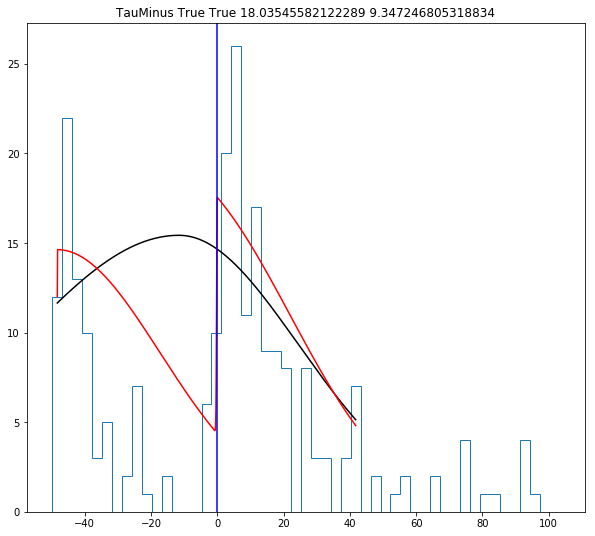

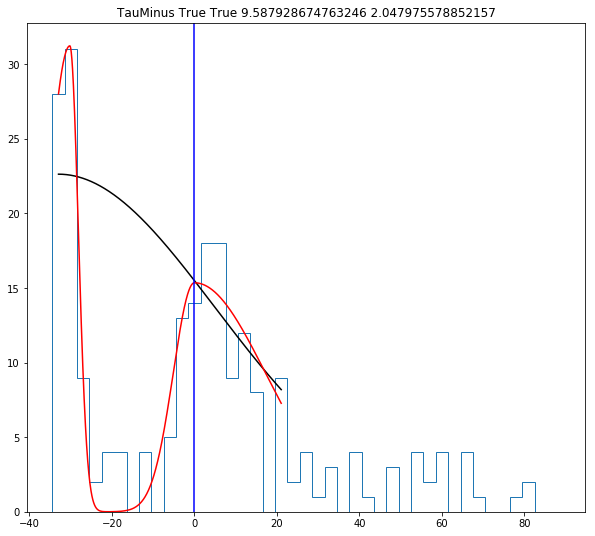

In [107]:
file_number = 412
#with f:
fnames = ['file', 'frame', 'lepton_type', 'DOM', 'string', 'recoPulses_time', 'recoPulses_charge']
#writer = csv.writer(f)
#writer.writeheader()
#writer.writerow(fnames)
for i in range(file_number, file_number+1):
    file_name = dataio.I3File('/data/p-one/akatil/step_5_medium_water/NuTau_NuE_20Events/step_5_'+str(i)+'_medium_water_custom_mDOM_recoPulse.i3.gz')
    frame_num = 0
    for frame in file_name:
        mctree = frame["I3MCTree"]
        primary = mctree.primaries
        lepton = dataclasses.I3MCTree.first_child(mctree, primary[0].id)

        recoPulseMap = frame['I3RecoPulses']
        
        for omkey in recoPulseMap.keys():
            recoPulseList = recoPulseMap[omkey]
                
            recoPulse_timeList = np.array([recoPulse.time for recoPulse in recoPulseList])
            recoPulse_chargeList = np.array([recoPulse.charge for recoPulse in recoPulseList])
            
            '''
            Removing DOMs with hits less than 150 Hits
            '''
            if sum(recoPulse_chargeList) < 200:
                continue

            '''
            Calculating the mean and removing the tails
            '''

            #mean = recoPulse_timeList.mean()
            mean = sum(recoPulse_timeList*recoPulse_chargeList)/sum(recoPulse_chargeList) #mean is weighted
            select_time = recoPulse_timeList[(recoPulse_timeList > mean-50) & (recoPulse_timeList < mean+50)]
            select_charge = recoPulse_chargeList[(recoPulse_timeList > mean-50) & (recoPulse_timeList < mean+50)]
            #print('SELECT CHARGE', select_charge, select_time, mean, recoPulse_timeList, recoPulse_chargeList)

            if len(select_time) < 10:
                continue

            mean_select_time = sum(select_time*select_charge)/sum(select_charge)
            max_hitTimes = recoPulse_timeList[(recoPulse_timeList > (mean_select_time-100))&(recoPulse_timeList < (mean_select_time+100))]
            max_charge = recoPulse_chargeList[(recoPulse_timeList > (mean_select_time-100))&(recoPulse_timeList < (mean_select_time+100))]
            

            #[using zscore to remove the effect of outliers from the analysis]
            z = stats.zscore(max_hitTimes)
            #max_hitTimes = max_hitTimes[(z>-14.0)&(z < 2.0)]
            #max_charge = max_charge[(z>-14.0)&(z < 2.0)]

            if len(max_hitTimes) < 10:
                continue

            #Shifting mean to zero
            max_hitTimes_mean = sum(max_hitTimes*max_charge)/sum(max_charge)
            timestamps = max_hitTimes - max_hitTimes_mean
            final_mean = sum(timestamps*max_charge)/sum(max_charge)

            '''
            Histogramming the data from simulation
            '''
            print('Now Histogramming')
            bins = np.arange(min(timestamps), max(timestamps), 3)
            num, bin_edges = np.histogram(timestamps, bins=bins, weights=max_charge)
            bin_centers = (bin_edges[:-1]+bin_edges[1:])/2
            
            num_ampRat = num/max(num)
            
            #array_sum = np.array([sum(num[0:ind]) for ind in range(0, len(num))])
            #percent = array_sum*100/num(sum)
            
            entries_in_bins = num[num_ampRat > 0.2]
            bin_centers = bin_centers[num_ampRat > 0.2]
            
        
            '''
            plt.figure(figsize=(10,9))
            _ = plt.hist(timestamps, bins=bins, weights=max_charge, histtype='step')
            plt.axvline(x=final_mean, c = 'r')
            plt.axvline(x=timestamps.mean(), c = 'k')
            '''
        

            '''
            Fitting bifurcated Gaussian and double bifurcated gaussian to
            the mcpe hit time distributions for both tau and electron.
            '''

            #Single Peak

            nll = lambda *args: log_likelihood_biGauss(*args)
            initial_biGauss = np.array([final_mean, 50, 5, max(entries_in_bins)/2])
            bnds_biGauss = ((min(bin_centers), max(bin_centers)), (0, 200), (0, 10), (0, 1e4))
            #print(bnds_biGauss)
            soln_biGauss = minimize(log_likelihood_biGauss, initial_biGauss,
                                        args=(entries_in_bins, bin_centers),
                                        #method='TNC',
                                        bounds = bnds_biGauss)
            
            print(soln_biGauss.x)

            #Double Peak

            nll = lambda *args: log_likelihood_doublePeak(*args)
            initial_doublePeak = np.array([min(bin_centers)+10, 20, 1, max(entries_in_bins)/2, final_mean, 20, 1, max(entries_in_bins)/2])
            bnds_doublePeak = ((min(bin_centers), final_mean), (0, 200), (0, 10), (0, 1e4),
                                    (final_mean, max(bin_centers)), (0, 200), (0, 10), (0,1e4))
            #print(bnds_doublePeak)
            soln_doublePeak = minimize(log_likelihood_doublePeak, initial_doublePeak,
                                        args=(entries_in_bins, bin_centers),
                                        #method='TNC',
                                        bounds=bnds_doublePeak)
            
            print(soln_doublePeak.x)
            
            LR_biGauss = likelihood_ratio_biGauss(bin_centers, entries_in_bins, soln_biGauss.x[0],
                                                  soln_biGauss.x[1], soln_biGauss.x[2], soln_biGauss.x[3])
            LR_doublePeak = likelihood_ratio_doublePeak(bin_centers, entries_in_bins, soln_doublePeak.x[0],
                                                        soln_doublePeak.x[1],soln_doublePeak.x[2],
                                                        soln_doublePeak.x[3], soln_doublePeak.x[4],
                                                        soln_doublePeak.x[5], soln_doublePeak.x[6],
                                                        soln_doublePeak.x[7])

            '''
            (x, y) values for the fit
            '''
            #x = bin_centers
            x = np.linspace(min(bin_centers), max(bin_centers), 1000)
            y_biGauss = biGauss(x, soln_biGauss.x[0],
                                    soln_biGauss.x[1], soln_biGauss.x[2], soln_biGauss.x[3])
            y_doublePeak = double_peak(x, soln_doublePeak.x[0], soln_doublePeak.x[1],
                                            soln_doublePeak.x[2], soln_doublePeak.x[3], soln_doublePeak.x[4],
                                            soln_doublePeak.x[5], soln_doublePeak.x[6], soln_doublePeak.x[7])



            plt.figure(figsize=(10,9))
            _ = plt.hist(timestamps, bins=bins, weights=max_charge, histtype='step')
            plt.plot(x, y_biGauss, '-', c = 'k')
            plt.plot(x, y_doublePeak, '-', c = 'r')
            plt.axvline(x=final_mean, c = 'b')
            plt.title(str(lepton.type)+' '+str(soln_biGauss.success) + ' ' +str(soln_doublePeak.success) + ' ' + str(LR_biGauss) + ' ' + str(LR_doublePeak))
                
        frame_num += 1

('Mean1', 8838.205298383207)
('Mean 2', 8830.293605141818)
('Mean 3', 7.911693241390249)
('MINIMUM HIT TIMES 2', 8813.234984219947)
Now Histogramming
('Single', ((-12.558620921870897, 17.441379078129103), (0, 100), (0, 10), (0, 58.0)))
('Double', ((-12.558620921870897, 7.911693241390249), (0, 100), (0, 10), (0, 58.0), (7.911693241390249, 17.441379078129103), (0, 100), (0, 10), (0, 58.0)))
('Mean1', 7216.687750328062)
('Mean 2', 7211.953692029574)
('Mean 3', 4.734058298488886)
('MINIMUM HIT TIMES 2', 7200.0)
Now Histogramming
('Single', ((-7.453692029574086, 7.546307970425914), (0, 100), (0, 10), (0, 457.0)))
('Double', ((-7.453692029574086, 4.734058298488886), (0, 100), (0, 10), (0, 457.0), (4.734058298488886, 7.546307970425914), (0, 100), (0, 10), (0, 457.0)))
('Mean1', 10133.239245032039)
('Mean 2', 10129.528488149224)
('Mean 3', 3.7107568828080124)
('MINIMUM HIT TIMES 2', 10119.292598803695)
Now Histogramming
('Single', ((-5.735889345529358, 6.264110654470642), (0, 100), (0, 10), (0

ValueError: limit for parameter x4 is invalid. (4.216261062550878, 3.3644584489775298)

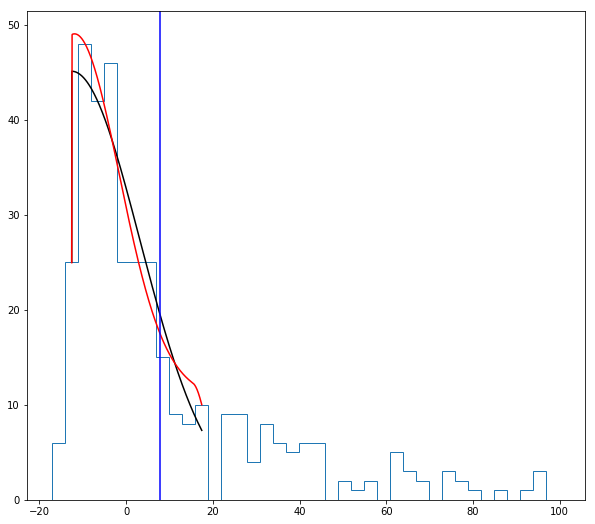

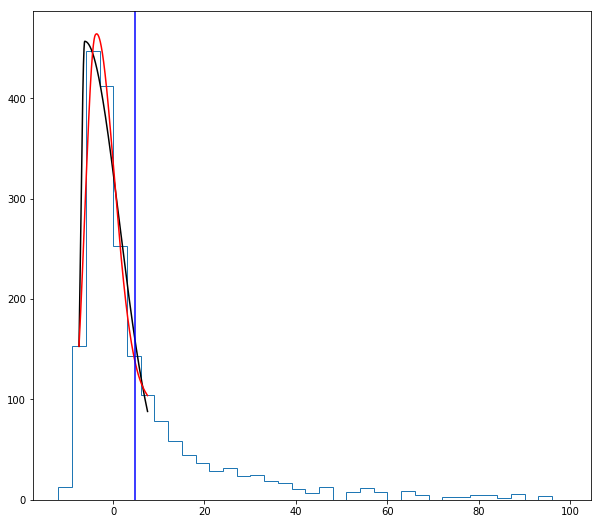

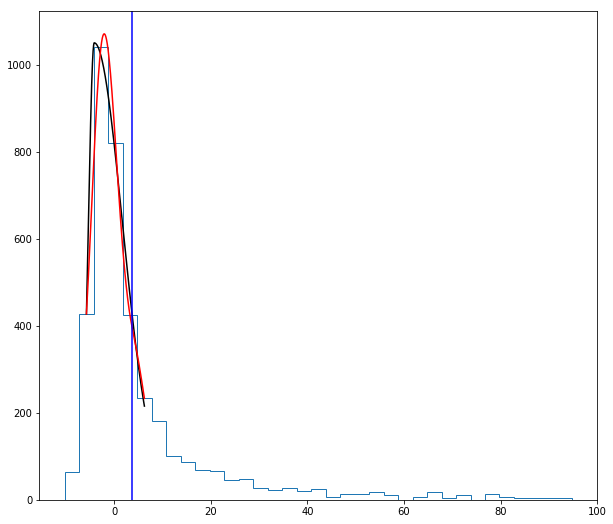

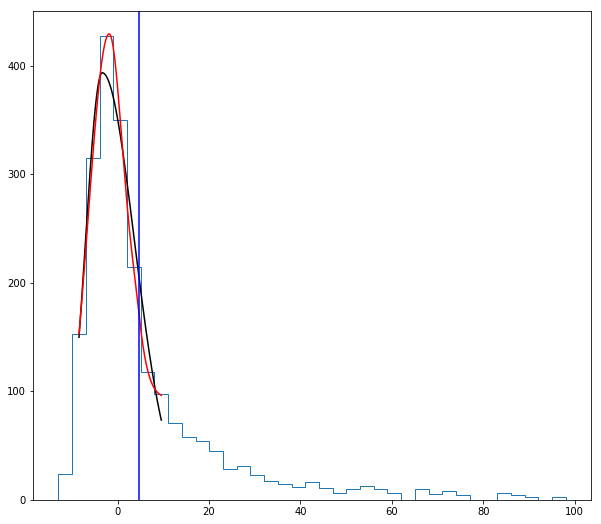

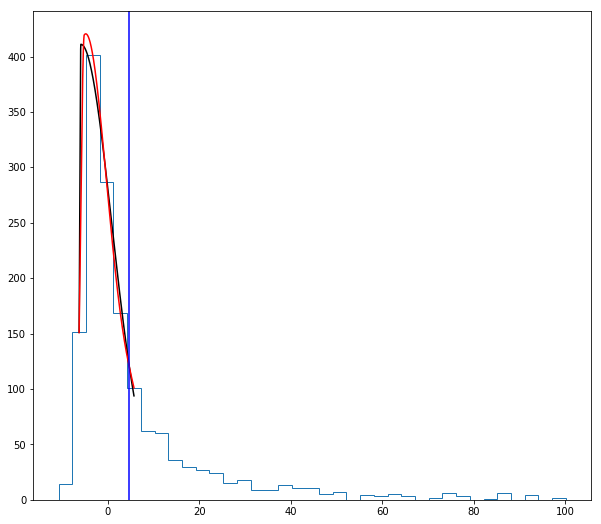

In [27]:
file_number = 1434
for i in range(file_number, file_number+1):
    file_name = dataio.I3File('/data/p-one/akatil/step_5_medium_water/NuTau_NuE_20Events/step_5_'+str(i)+'_medium_water_custom_mDOM_recoPulse.i3.gz')
    frame_num = 0
    for frame in file_name:
        recoPulseMap = frame['I3RecoPulses']
        for omkey in recoPulseMap.keys():
            recoPulseList = recoPulseMap[omkey]
            recoPulse_timeList = np.array([recoPulse.time for recoPulse in recoPulseList])
            recoPulse_chargeList = np.array([recoPulse.charge for recoPulse in recoPulseList])

            '''
            Removing DOMs with hits less than 200 Hits
            '''
            if sum(recoPulse_chargeList) < 200:
                continue

            '''
            Calculating the mean and removing the tails
            '''

            #mean = recoPulse_timeList.mean()
            mean = sum(recoPulse_timeList*recoPulse_chargeList)/sum(recoPulse_chargeList) #mean is weighted
            select_time = recoPulse_timeList[(recoPulse_timeList > mean-50) & (recoPulse_timeList < mean+50)]
            select_charge = recoPulse_chargeList[(recoPulse_timeList > mean-50) & (recoPulse_timeList < mean+50)]
            #print('SELECT CHARGE', select_charge, select_time, mean, recoPulse_timeList, recoPulse_chargeList)

            if len(select_time) < 10:
                continue

            mean_select_time = sum(select_time*select_charge)/sum(select_charge)
            max_hitTimes = recoPulse_timeList[(recoPulse_timeList > (mean_select_time-100))&(recoPulse_timeList < (mean_select_time+100))]
            max_charge = recoPulse_chargeList[(recoPulse_timeList > (mean_select_time-100))&(recoPulse_timeList < (mean_select_time+100))]

            if len(max_hitTimes) < 10:
                continue

            #Shifting mean to zero
            max_hitTimes_mean = sum(max_hitTimes*max_charge)/sum(max_charge)
            print('Mean1', max_hitTimes_mean)
            #timestamps = max_hitTimes
            #final_mean = sum(timestamps*max_charge)/sum(max_charge)
            max_charge_for_mean = max_charge[(max_hitTimes > max_hitTimes_mean - 20) & (max_hitTimes < max_hitTimes_mean + 20)]
            final_mean = sum(max_hitTimes[(max_hitTimes > max_hitTimes_mean - 20) & (max_hitTimes < max_hitTimes_mean + 20)]*max_charge_for_mean)/sum(max_charge_for_mean)
            print('Mean 2', final_mean)
            timestamps = max_hitTimes - final_mean
            final_mean = sum(timestamps*max_charge)/sum(max_charge)
            print('Mean 3', final_mean)
            print('MINIMUM HIT TIMES 2', min(max_hitTimes))
            '''
            Histogramming the data from simulation
            '''
            print('Now Histogramming')
            bins = np.arange(min(timestamps), max(timestamps), 3)
            num, bin_edges = np.histogram(timestamps, bins=bins, weights=max_charge)
            bin_centers = (bin_edges[:-1]+bin_edges[1:])/2

            num_ampRatio = num/max(num)

            #removing bins which are <1/5 the max(num), removing the tails this way.
            entries_in_bins = num[num_ampRatio > 0.2]
            bin_centers = bin_centers[num_ampRatio > 0.2]
            
            if max(bin_centers) <= 0:
                maxBinCenter = max(bin_centers) + abs(max(bin_centers)) + 3
                continue
            else:
                maxBinCenter = max(bin_centers)
            

            '''
            Fitting bifurcated Gaussian and double bifurcated gaussian to
            the mcpe hit time distributions for both tau and electron.
            '''

            #Single Peak

            nll = lambda *args: log_likelihood_biGauss(*args)
            initial_biGauss = np.array([final_mean, 50, 5, max(entries_in_bins)])
            bnds_biGauss = ((min(bin_centers), maxBinCenter), (0, 100), (0, 10), (0, max(entries_in_bins)+10))
            print('Single', bnds_biGauss)
            soln_biGauss = minimize(log_likelihood_biGauss, initial_biGauss,
                                        args=(entries_in_bins, bin_centers),
                                        #method='TNC',
                                        bounds = bnds_biGauss)
           

            #Double Peak

            nll = lambda *args: log_likelihood_doublePeak(*args)
            initial_doublePeak = np.array([min(bin_centers)+10, 20, 1, max(entries_in_bins), final_mean, 20, 1, max(entries_in_bins)])
            bnds_doublePeak = ((min(bin_centers), final_mean), (0, 100), (0, 10), (0, max(entries_in_bins)+10),
                                    (final_mean, maxBinCenter), (0, 100), (0, 10), (0,max(entries_in_bins)+10))
            print('Double', bnds_doublePeak)
            soln_doublePeak = minimize(log_likelihood_doublePeak, initial_doublePeak,
                                        args=(entries_in_bins, bin_centers),
                                        #method='TNC',
                                        bounds=bnds_doublePeak)
            

            '''
            Calculating the Likelihood ratio for bifurcated gaussian
            and double double bifurcated gaussian
            '''
            LR_biGauss = likelihood_ratio_biGauss(bin_centers, entries_in_bins, soln_biGauss.x[0],
                                                  soln_biGauss.x[1], soln_biGauss.x[2], soln_biGauss.x[3])
            LR_doublePeak = likelihood_ratio_doublePeak(bin_centers, entries_in_bins, soln_doublePeak.x[0],
                                                        soln_doublePeak.x[1],soln_doublePeak.x[2],
                                                        soln_doublePeak.x[3], soln_doublePeak.x[4],
                                                        soln_doublePeak.x[5], soln_doublePeak.x[6],
                                                        soln_doublePeak.x[7])
            
            '''
            (x, y) values for the fit
            '''
            #x = bin_centers
            x = np.linspace(min(bin_centers), max(bin_centers), 1000)
            y_biGauss = biGauss(x, soln_biGauss.x[0],
                                    soln_biGauss.x[1], soln_biGauss.x[2], soln_biGauss.x[3])
            y_doublePeak = double_peak(x, soln_doublePeak.x[0], soln_doublePeak.x[1],
                                            soln_doublePeak.x[2], soln_doublePeak.x[3], soln_doublePeak.x[4],
                                            soln_doublePeak.x[5], soln_doublePeak.x[6], soln_doublePeak.x[7])



            plt.figure(figsize=(10,9))
            _ = plt.hist(timestamps, bins=bins, weights=max_charge, histtype='step')
            plt.plot(x, y_biGauss, '-', c = 'k')
            plt.plot(x, y_doublePeak, '-', c = 'r')
            plt.axvline(x=final_mean, c = 'b')
            #plt.title(str(lepton.type)+' '+str(soln_biGauss.success) + ' ' +str(soln_doublePeak.success) + ' ' + str(LR_biGauss) + ' ' + str(LR_doublePeak))
                
        frame_num += 1

In [5]:
minimize?

In [16]:
scipy.optimize.minimize?

In [100]:
'''
Reading the output file
'''

readFile = dataio.I3File('/data/p-one/akatil/test/step_6_713_parameters.i3.gz')
for frame in readFile:
    params = frame['Parameters_doublePeak']
    for omkey in params.keys():
        vals = params[omkey]
        print(vals)

[-272.398, -4.63726, 20.5006, 1.03919, 33.1536, 5.13235, 32.4042, 0.184512, 6.43356, -nan]
[-2401.95, -9.46161, 19.8709, 0.000225654, 186.875, 12.3931, 81.6318, 0.142788, 12.7155, 12.9151]
[-34335.3, -1.63319, 13.0682, 0.515781, 2148.58, 18.6995, 298.142, 10, 57.5556, 56.8229]
[-20752, -4.5722, 22.4004, 0.441407, 899.526, 15.1168, 50.0051, 0.391425, 63.1332, 21.286]
[-3105.25, -6.46846, 40.6931, 0.804097, 104.26, 6.06715, 60.3317, 0.108835, 29.4211, 3.49838]
[-99.3799, -8.1503, 12.4977, 9.99933, 11.775, 8.99719, 128.401, 2.65557, 5.68779, -nan]
[-535.59, -7.66529, 17.4848, 0.000116574, 59.9594, 16.2866, 151.383, 6.76913, 5.4043, 2.12686]
[-3975.65, -2.65322, 15.0813, 0.348649, 330.374, 13.729, 37.7523, 0.63943, 13.3787, -nan]
[-658.868, -7.00903, 33.452, 0.621359, 41.735, 7.31136, 26.9008, 0.0139056, 13.2555, -nan]
[-743.435, -12.029, 32.9148, 3.70843e-05, 39.5044, 5.71644, 14.6729, 1.36122, 28.7429, -nan]
[-19918.4, -1.94394, 16.5337, 0.314554, 1192.04, 17.4032, 26.1249, 0.0296792, 21